In [31]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import sys
# import spateo as st
sys.path.insert(0,'../')
sys.path.insert(0,'../morpho')
import morpho
import matplotlib.pyplot as plt
import ipympl
import scanpy
import numpy as np
from jupyterthemes import jtplot
# jtplot.style(theme="grade3")
jtplot.style(theme="onedork")
import warnings
from tqdm import trange
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# data_dir='../data/E3_5_4h_d/bin20_data'
data_dir='../data/E3_5_4h_d/final_seg_data'
slices = [scanpy.read_h5ad(os.path.join(data_dir, file_name)) for file_name in sorted(os.listdir(data_dir))]

In [33]:
slices[0]

AnnData object with n_obs × n_vars = 503 × 6995
    obs: 'area', 'slices'
    uns: '__type', 'raw_min', 'spatial'
    obsm: 'bbox', 'contour', 'spatial'

In [34]:
align_models_serially, init_models, norm_coords = morpho.morpho_align_optimization(
    models=slices,
    normalize_c=True,
    normalize_g=False,
    vis_optimiation=False
)

AttributeError: module 'morpho' has no attribute 'morpho_align_optimization'

In [41]:
align_models, coarse_align_models = morpho.morpho_align_global(
            models=slices,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.05,
            verbose=True,
            )

|-----> [Start morpho coarse alignment] in progress: 5.0000%gamma: 0.4548015951140528
beta2: 0.05
sigma2: 0.014472076917354472
|-----> [Start morpho coarse alignment] in progress: 10.0000%gamma: 0.7052044294148947
beta2: 0.05
sigma2: 0.016312860087760592
|-----> [Start morpho coarse alignment] in progress: 15.0000%gamma: 0.99
beta2: 0.05
sigma2: 0.010822333169505304
|-----> [Start morpho coarse alignment] in progress: 20.0000%gamma: 0.8791681429466082
beta2: 0.05
sigma2: 0.018222141825082323
|-----> [Start morpho coarse alignment] in progress: 25.0000%gamma: 0.99
beta2: 0.05
sigma2: 0.012089248028424138
|-----> [Start morpho coarse alignment] in progress: 30.0000%gamma: 0.9754792419833116
beta2: 0.05
sigma2: 0.009655908115123782
|-----> [Start morpho coarse alignment] in progress: 35.0000%gamma: 0.99
beta2: 0.05
sigma2: 0.008166412014959285
|-----> [Start morpho coarse alignment] in progress: 40.0000%gamma: 0.9362707211065576
beta2: 0.05
sigma2: 0.010180319849152526
|-----> [Start morp

In [40]:
import paste as pst
import ot
import time
import tqdm
# sliceA_paste, sliceB_paste = slices[i].copy(), slices[i+1].copy()
# t1 = time.time()
# pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=True,backend = ot.backend.TorchBackend())
# pis = pst.
# # pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=False)
# pis = [pi]
# new_slices = pst.stack_slices_pairwise([sliceA_paste, sliceB_paste], pis)
# t2 = time.time()
# print("Paste costs {:.5} s".format(t2-t1))

paste_align_models = [model.copy() for model in slices]
for i in trange(len(slices)-1):
    
    sliceA_paste, sliceB_paste = paste_align_models[i], paste_align_models[i+1]
    # align_models, _ = morpho.models_align(
    #         models=[sliceA_paste,sliceB_paste],
    #         spatial_key="spatial",
    #         key_added="align_spatial",
    #         device="3",
    #         )
    pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=True,backend = ot.backend.TorchBackend())
    pis = [pi]
    new_slices = pst.stack_slices_pairwise([sliceA_paste, sliceB_paste], pis)
    paste_align_models[i+1] = new_slices[1]

  0%|          | 0/20 [00:00<?, ?it/s]

|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 6184 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [0.8223s]


  5%|▌         | 1/20 [00:00<00:15,  1.21it/s]

|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 6666 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [1.7197s]


 10%|█         | 2/20 [00:02<00:24,  1.36s/it]

|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 6870 common genes.


 10%|█         | 2/20 [00:05<00:45,  2.51s/it]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

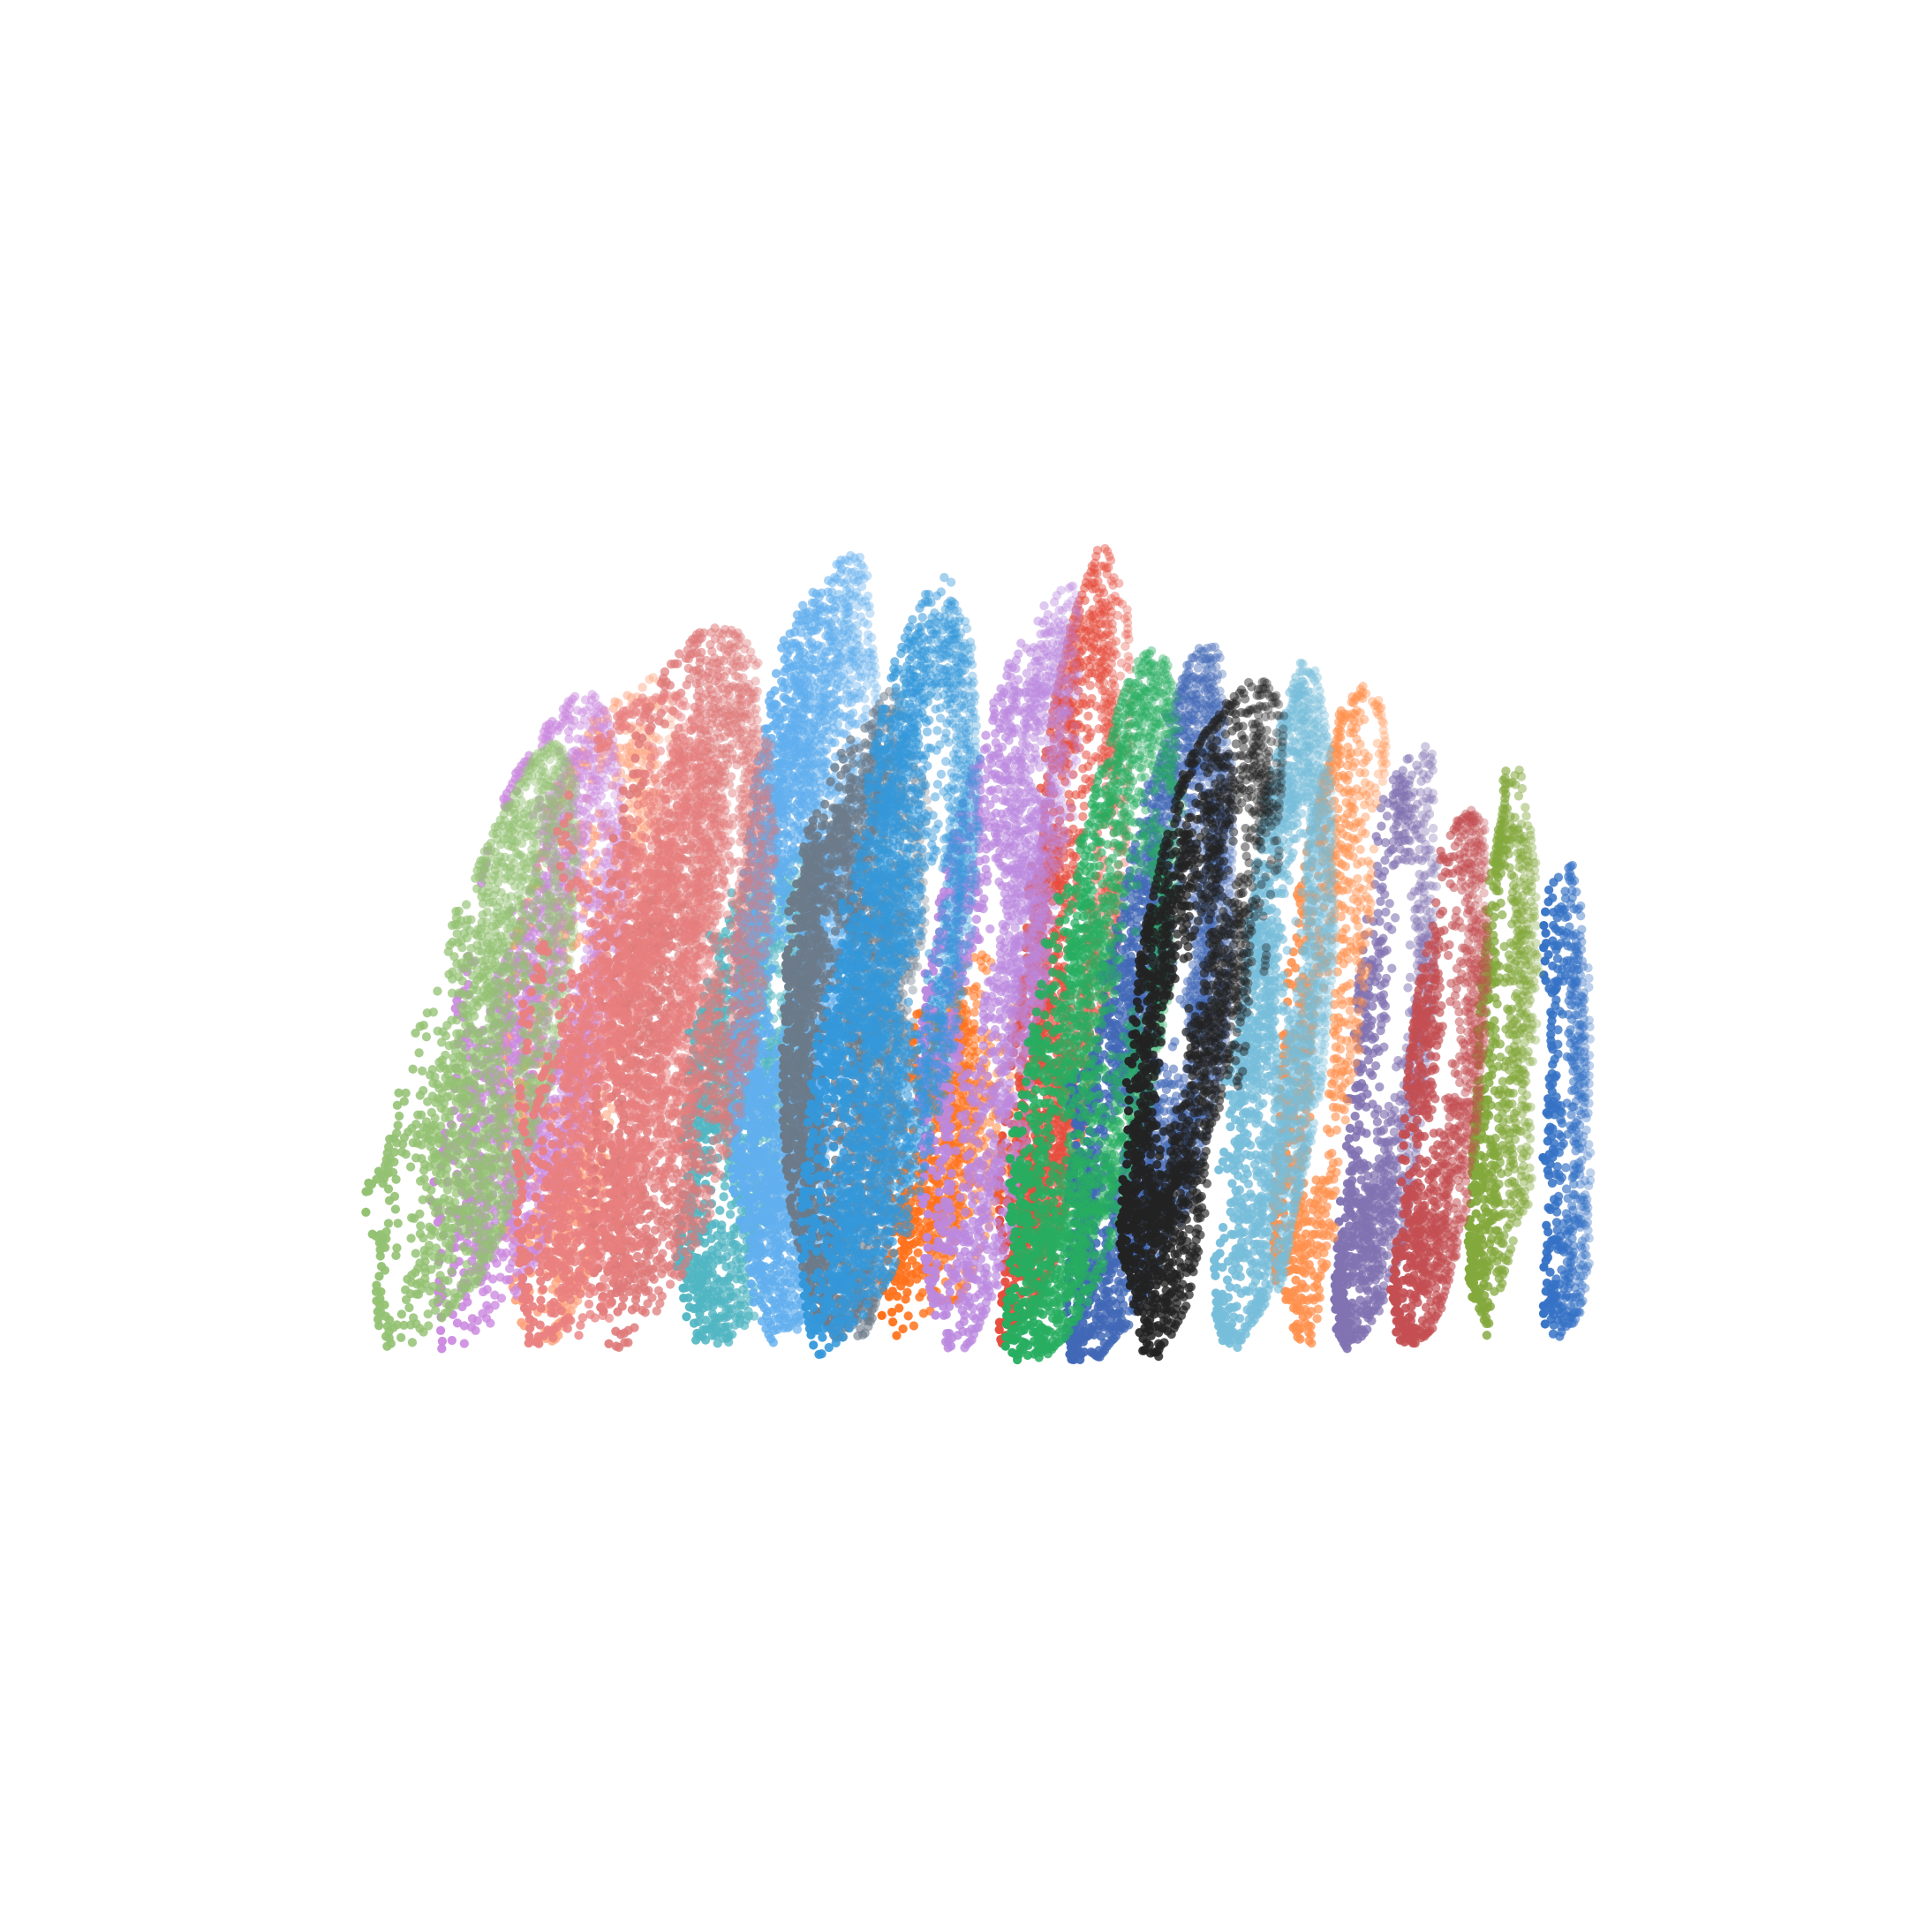

In [25]:
%matplotlib inline
elev = 0
azim = 100

s = 100
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index, slice in enumerate(slices):
    ax.scatter(index,slice.obsm['spatial'][:,0],slice.obsm['spatial'][:,1],s=s)
ax.axis('off')
ax.set_facecolor('white')

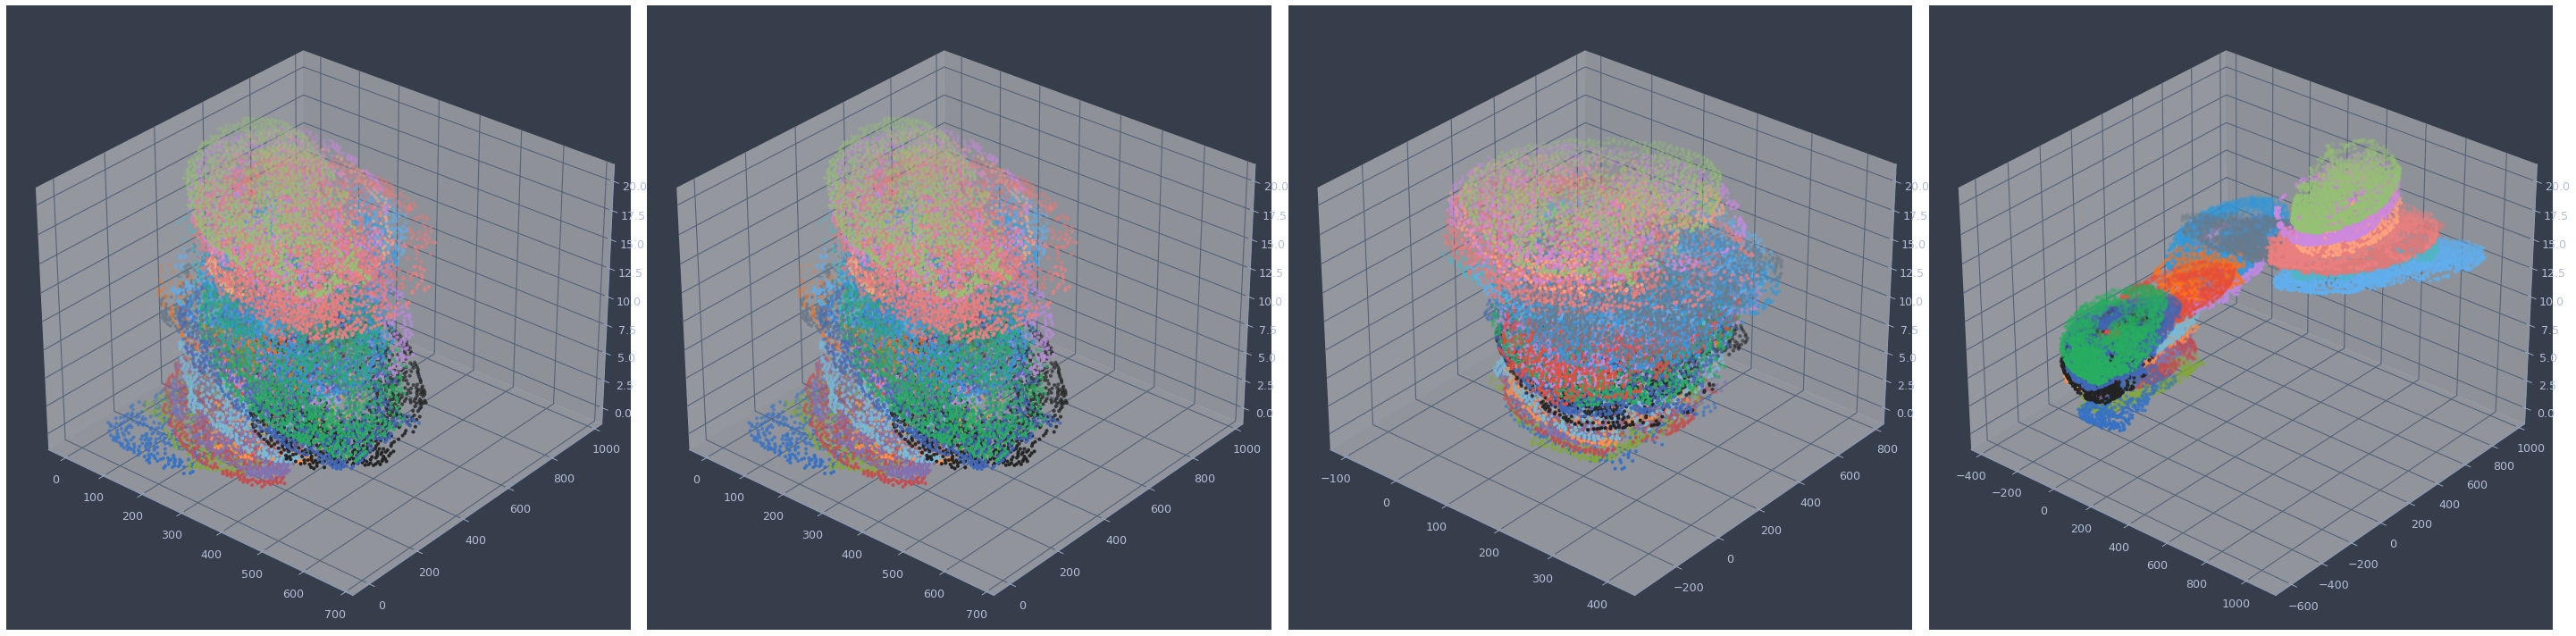

In [42]:
%matplotlib inline
elev = 30
azim = -50

s = 15
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(1,4,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index, slice in enumerate(slices):
    ax.scatter(slice.obsm['spatial'][:,0],slice.obsm['spatial'][:,1],index,s=s)
ax = fig.add_subplot(1,4,2,projection='3d')
ax.view_init(elev=elev, azim=azim)

for index, slice in enumerate(paste_align_models):
    ax.scatter(slice.obsm['align_spatial'][:,0],slice.obsm['align_spatial'][:,1],index,s=s)
ax = fig.add_subplot(1,4,3,projection='3d')
ax.view_init(elev=elev, azim=azim)

for index, slice in enumerate(coarse_align_models):
    ax.scatter(slice.obsm['align_spatial'][:,0],slice.obsm['align_spatial'][:,1],index,s=s)

ax = fig.add_subplot(1,4,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index, slice in enumerate(align_models):
    ax.scatter(slice.obsm['align_spatial'][:,0],slice.obsm['align_spatial'][:,1],index,s=s)
plt.tight_layout()
plt.show()

In [3]:
data_dir='../data/cellbin_h5ad'
# data_dir='../data/E3_5_4h_d/bin20_data'
# data_dir='../data/E3_5_4h_d/final_seg_data'
slices_2 = [scanpy.read_h5ad(os.path.join(data_dir, file_name)) for file_name in sorted(os.listdir(data_dir))]

In [10]:
align_models_serially_2, init_models_2, norm_coords_2 = morpho.morpho_align_optimization(
    models=slices_2,
    normalize_c=True,
    normalize_g=False,
    vis_optimiation=False
)

|-----> [Models initial alignment] in progress: 4.1667%|-----> Filtered all samples for common genes. There are 5266 common genes.
|-----> [Models initial alignment] in progress: 8.3333%|-----> Filtered all samples for common genes. There are 7127 common genes.
|-----> [Models initial alignment] in progress: 12.5000%|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> [Models initial alignment] in progress: 16.6667%|-----> Filtered all samples for common genes. There are 7776 common genes.
|-----> [Models initial alignment] in progress: 20.8333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> [Models initial alignment] in progress: 25.0000%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models initial alignment] in progress: 29.1667%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models initial alignment] in progress: 33.3333%|-----> Filtered all s

In [26]:
import paste as pst
import ot
import time
import tqdm

paste_align_models_2 = [model.copy() for model in slices_2]
for i in trange(len(slices_2)-1):
    sliceA_paste_2, sliceB_paste_2 = paste_align_models_2[i], paste_align_models_2[i+1]
    # pi = pst.pairwise_align(sliceA_paste_2, sliceB_paste_2, use_gpu=True, backend = ot.backend.TorchBackend())
    pi = pst.pairwise_align(sliceA_paste_2, sliceB_paste_2, use_gpu=False)
    pis = [pi]
    new_slices = pst.stack_slices_pairwise([sliceA_paste_2, sliceB_paste_2], pis)
    paste_align_models_2[i+1] = new_slices[1]
    # print(new_slices[1])

  0%|          | 0/24 [00:00<?, ?it/s]

gpu is available, using gpu.


  0%|          | 0/24 [00:00<?, ?it/s]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

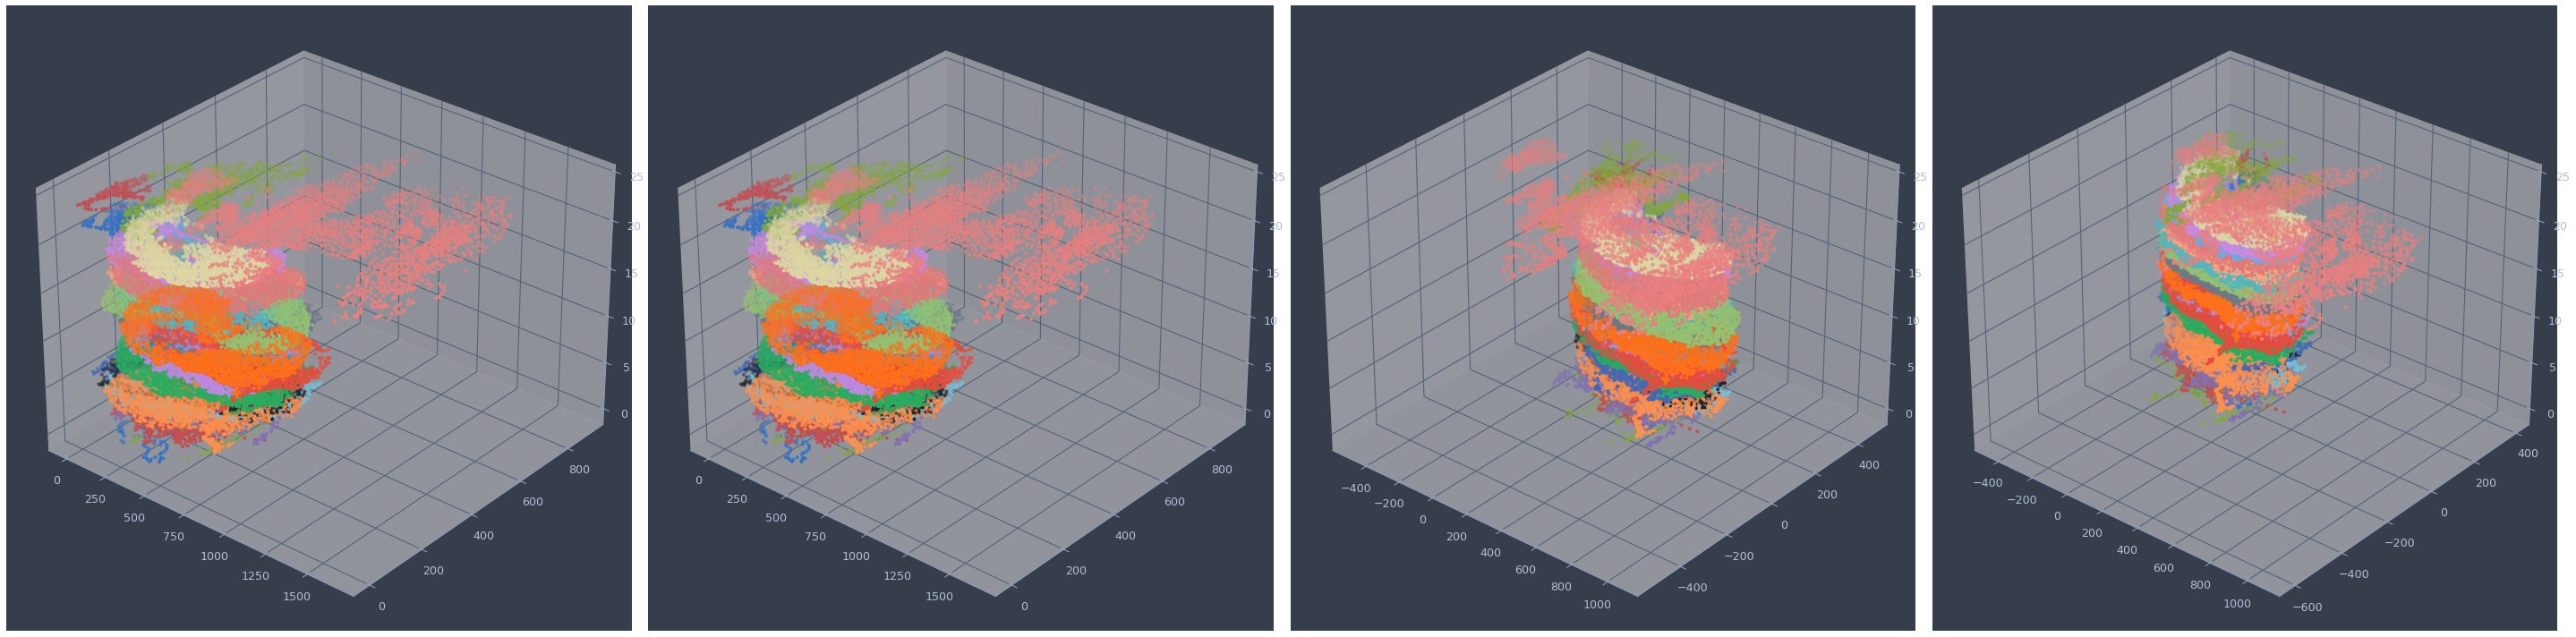

In [19]:
%matplotlib inline
elev = 30
azim = -50

s = 15
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(1,4,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index, slice in enumerate(slices_2):
    ax.scatter(slice.obsm['spatial'][:,0],slice.obsm['spatial'][:,1],index,s=s)
ax = fig.add_subplot(1,4,2,projection='3d')
ax.view_init(elev=elev, azim=azim)

for index, slice in enumerate(slices_2):
    ax.scatter(slice.obsm['align_spatial'][:,0],slice.obsm['align_spatial'][:,1],index,s=s)
ax = fig.add_subplot(1,4,3,projection='3d')
ax.view_init(elev=elev, azim=azim)

for index, slice in enumerate(init_models_2):
    ax.scatter(slice.obsm['align_spatial'][:,0],slice.obsm['align_spatial'][:,1],index,s=s)

ax = fig.add_subplot(1,4,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index, slice in enumerate(align_models_serially_2):
    ax.scatter(slice.obsm['align_spatial'][:,0],slice.obsm['align_spatial'][:,1],index,s=s)
plt.tight_layout()
plt.show()